In [1]:
#import packages

import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn
import os

%matplotlib notebook

In [2]:
#set working directory
os.chdir('C:/Users/siree/OneDrive/Desktop/WGU/D212/D212_files')

In [3]:
#looking up my working directory
cwd = os.getcwd()
print(cwd)

C:\Users\siree\OneDrive\Desktop\WGU\D212\D212_files


In [4]:
#reading the CSV file
data = pd.read_csv('churn_clean.csv')

In [5]:
##### C1: CONTINUOUS DATA SET VARIABLES ########

In [6]:
#Select continuous variables
continuous_data = data[['Income','Outage_sec_perweek','Tenure','MonthlyCharge','Bandwidth_GB_Year']]

In [7]:
#### C2: STANDARDIZATION OF DATA SET VARIABLES #####

In [8]:
#Standardizing the continuous variables
scaler = StandardScaler()
standardized_data = scaler.fit_transform(continuous_data)

In [9]:
#DataFrame of standardized data
standardized_df = pd.DataFrame(standardized_data, columns=continuous_data.columns)

In [10]:
#standardized data
print(standardized_df.head())

     Income  Outage_sec_perweek    Tenure  MonthlyCharge  Bandwidth_GB_Year
0 -0.398778           -0.679978 -1.048746      -0.003943          -1.138487
1 -0.641954            0.570331 -1.262001       1.630326          -1.185876
2 -1.070885            0.252347 -0.709940      -0.295225          -0.612138
3 -0.740525            1.650506 -0.659524      -1.226521          -0.561857
4  0.009478           -0.623156 -1.242551      -0.528086          -1.428184


In [11]:
standardized_df.to_csv('C:/Users/siree/OneDrive/Desktop/WGU/D212/TASK_2/PA_D212_cleaned_data_SireenShaban.csv')

In [12]:
#### D1: PRINCIPAL COMPONENTS #####

In [13]:
#select columns for PCA
PCA1 = standardized_df[['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year' ]]

In [14]:
#apply PCA
pca = PCA(n_components = PCA1.shape[1])
print(pca)

PCA(n_components=5)


In [15]:
pca.fit(PCA1)

PCA(n_components=5)

In [16]:
PCA1_pca = pd.DataFrame(pca.transform(PCA1), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [17]:
#PCA LOADINGS
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = PCA1.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
Income,0.003936,0.365683,0.897256,0.247368,-0.001250
Outage_sec_perweek,0.005858,-0.682929,0.078077,0.726276,0.000034
Tenure,0.705844,0.039973,-0.030063,0.035159,-0.705724
MonthlyCharge,0.040748,-0.631099,0.433512,-0.640363,-0.045361
Bandwidth_GB_Year,0.707159,0.000089,-0.000613,-0.005588,0.707032


In [18]:
#### D2: IDENTIFICATION OF THE TOTAL NUMBER OF COMPONENTS ####

In [19]:
#SELECTING PCs
cov_matrix = np.dot(PCA1.T, PCA1) / PCA1.shape[0]

In [20]:
#eigenvalues
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

<IPython.core.display.Javascript object>


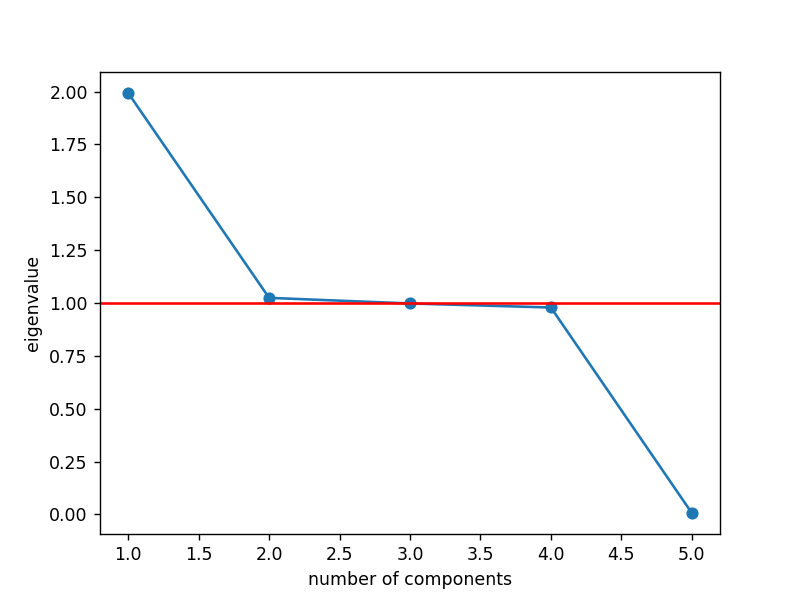

In [21]:
#plot
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker = 'o')
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color = "red")
plt.show()

In [22]:
#### D3: VARIANCE OF EACH COMPONENT ####

In [26]:
# Calculating the variance
explained_variances = pca.explained_variance_
print(explained_variances)

[1.99338587 1.02423108 0.99769912 0.97872658 0.0064574 ]


In [24]:
#### D4: TOTAL VARIANCE CAPTURED BY COMPONENTS ######

In [27]:
#Calculating the total variance
total_variance = explained_variances[:5].sum()
print(total_variance)

5.000500050005002
